<a href="https://colab.research.google.com/github/cleysonl/Fast-Ai/blob/master/lesson6_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [0]:
bs = 64

In [0]:
path = untar_data(URLs.PETS)/'images'

## **Data Augmentation**

In [0]:
tfms = get_transforms(max_rotate=20, max_zoom=1.3, max_lighting=0.4, max_warp=0.4,
                      p_affine=1., p_lighting =1.)

In [8]:
doc(get_transforms)

In [0]:
src = ImageList.from_folder(path).split_by_rand_pct(0.2, seed=2)

In [0]:
def get_data(size, bs, padding_mode= 'reflection'):
  return (src.label_from_re(r'([^/]+)_\d+.jpg$').
          transform(tfms, size=size, padding_mode=padding_mode).
          databunch(bs=bs).normalize(imagenet_stats))

In [0]:
data = get_data(224, bs, 'zeros')

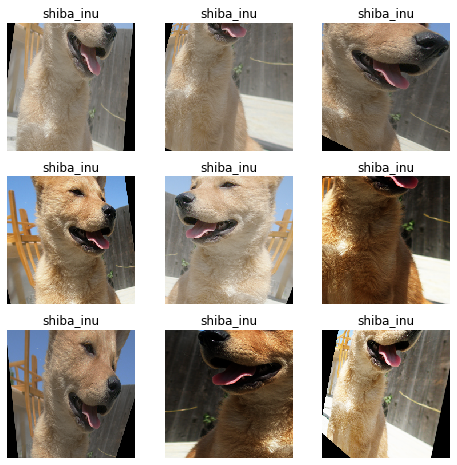

In [15]:
def _plot(i,j,ax):
  x,y = data.train_ds[3]
  x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,8))

In [0]:
# padding = 'reflection'
data = get_data(224,bs)

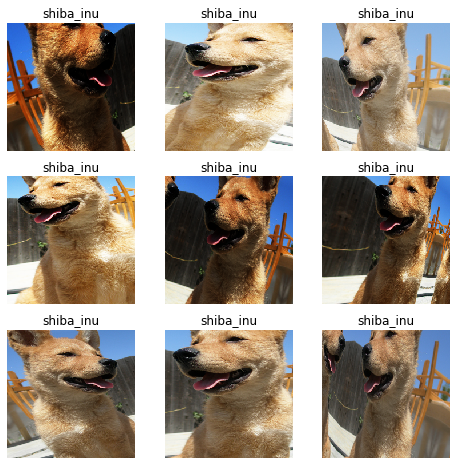

In [17]:
plot_multi(_plot,3,3, figsize=(8,8))

##**Train a model**